# Graduate Admission Prediction

Many factors are considered by the universities when provding an admit for a student. This predictive analysis focuses on importance of each attribute to accurately determine if the student will get an admit. I have also compared vaious algorithms to see which fits in best for the dataset.


In [192]:
#importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
#read data
data = pd.read_csv('D://Admission_Predict_Ver1.1.csv')

### Exploratory Analysis

In [194]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [197]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [195]:
data.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [196]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [200]:
data = data.rename(columns={'LOR ': 'LOR'})

In [222]:
#creating a dataframe for mininum, maxinmum & average values of features
l = []
index =['GRE Score','TOEFL Score','CGPA','SOP','LOR']
for i in index:
    print(i)
    ele = data[i].max()
    ele2 = data[i].min()
    ele3 = data[i].mean()
    l.append([ele,ele2,ele3])
new_df = pd.DataFrame(l,index = index, columns = ['Max','Min', 'Mean'])
new_df


GRE Score
TOEFL Score
CGPA
SOP
LOR


,Max,Min,Mean
GRE Score,340.00,290.0,316.47200
TOEFL Score,120.00,92.0,107.19200
CGPA,9.92,6.8,8.57644
SOP,5.00,1.0,3.37400
LOR,5.00,1.0,3.48400


### Data Visualizations

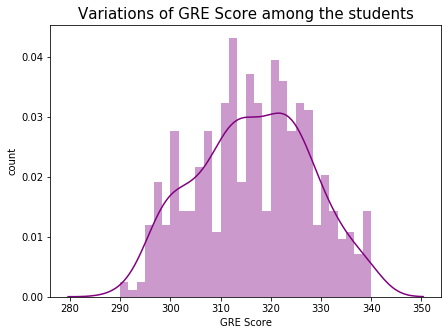

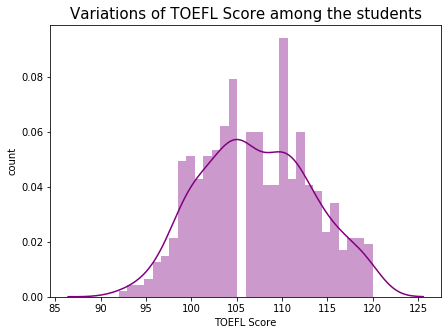

In [171]:
#plotting the variations in GRE and Toefl

exam_list = ['GRE Score', 'TOEFL Score']
for i in exam_list:
    sns.distplot(data[i], color = 'purple', bins = 30)
    plt.title('Variations of '+ i +' among the students', fontsize = 15)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()
    

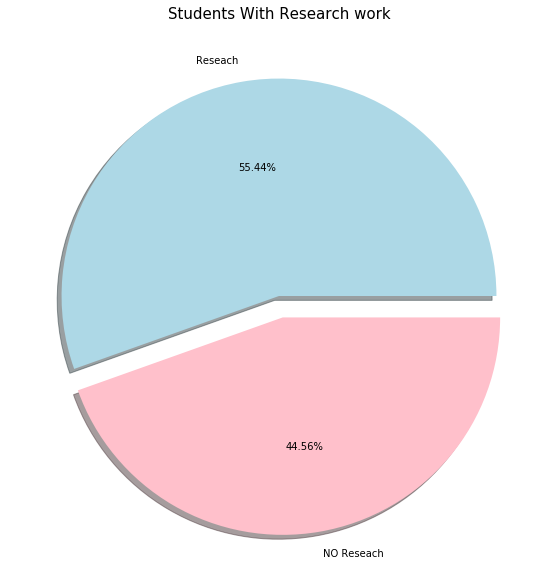

In [202]:
#Distribution of Research of students
size = [499, 401]
labels = "Reseach", "NO Reseach"
colors = ['lightblue', 'pink']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (10, 10)

plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Students With Research work', fontsize = 15)
plt.axis('off')
plt.show()

In [173]:
data['University Rating'].value_counts()

3    162
2    126
4    105
5     73
1     34
Name: University Rating, dtype: int64

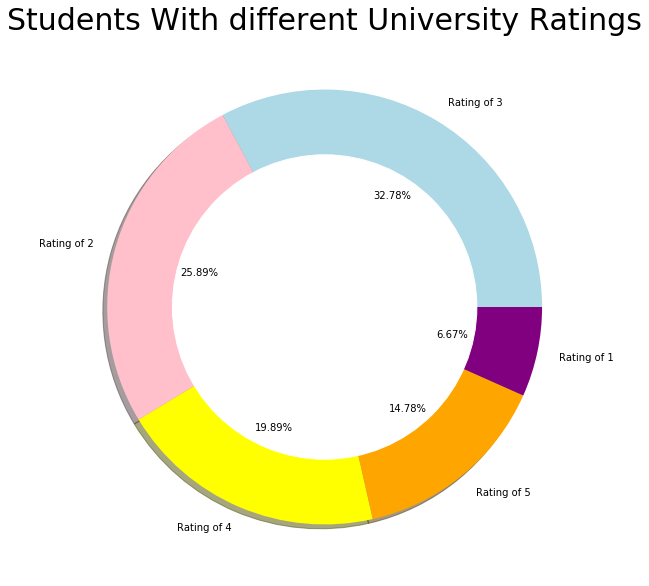

In [203]:
#University rankings distribution
size = [295, 233, 179, 133, 60]
labels = "Rating of 3", "Rating of 2", "Rating of 4", "Rating of 5", "Rating of 1"
colors = ['lightblue', 'pink', 'yellow', 'orange', 'purple']

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Students With different University Ratings', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('off')
plt.show()

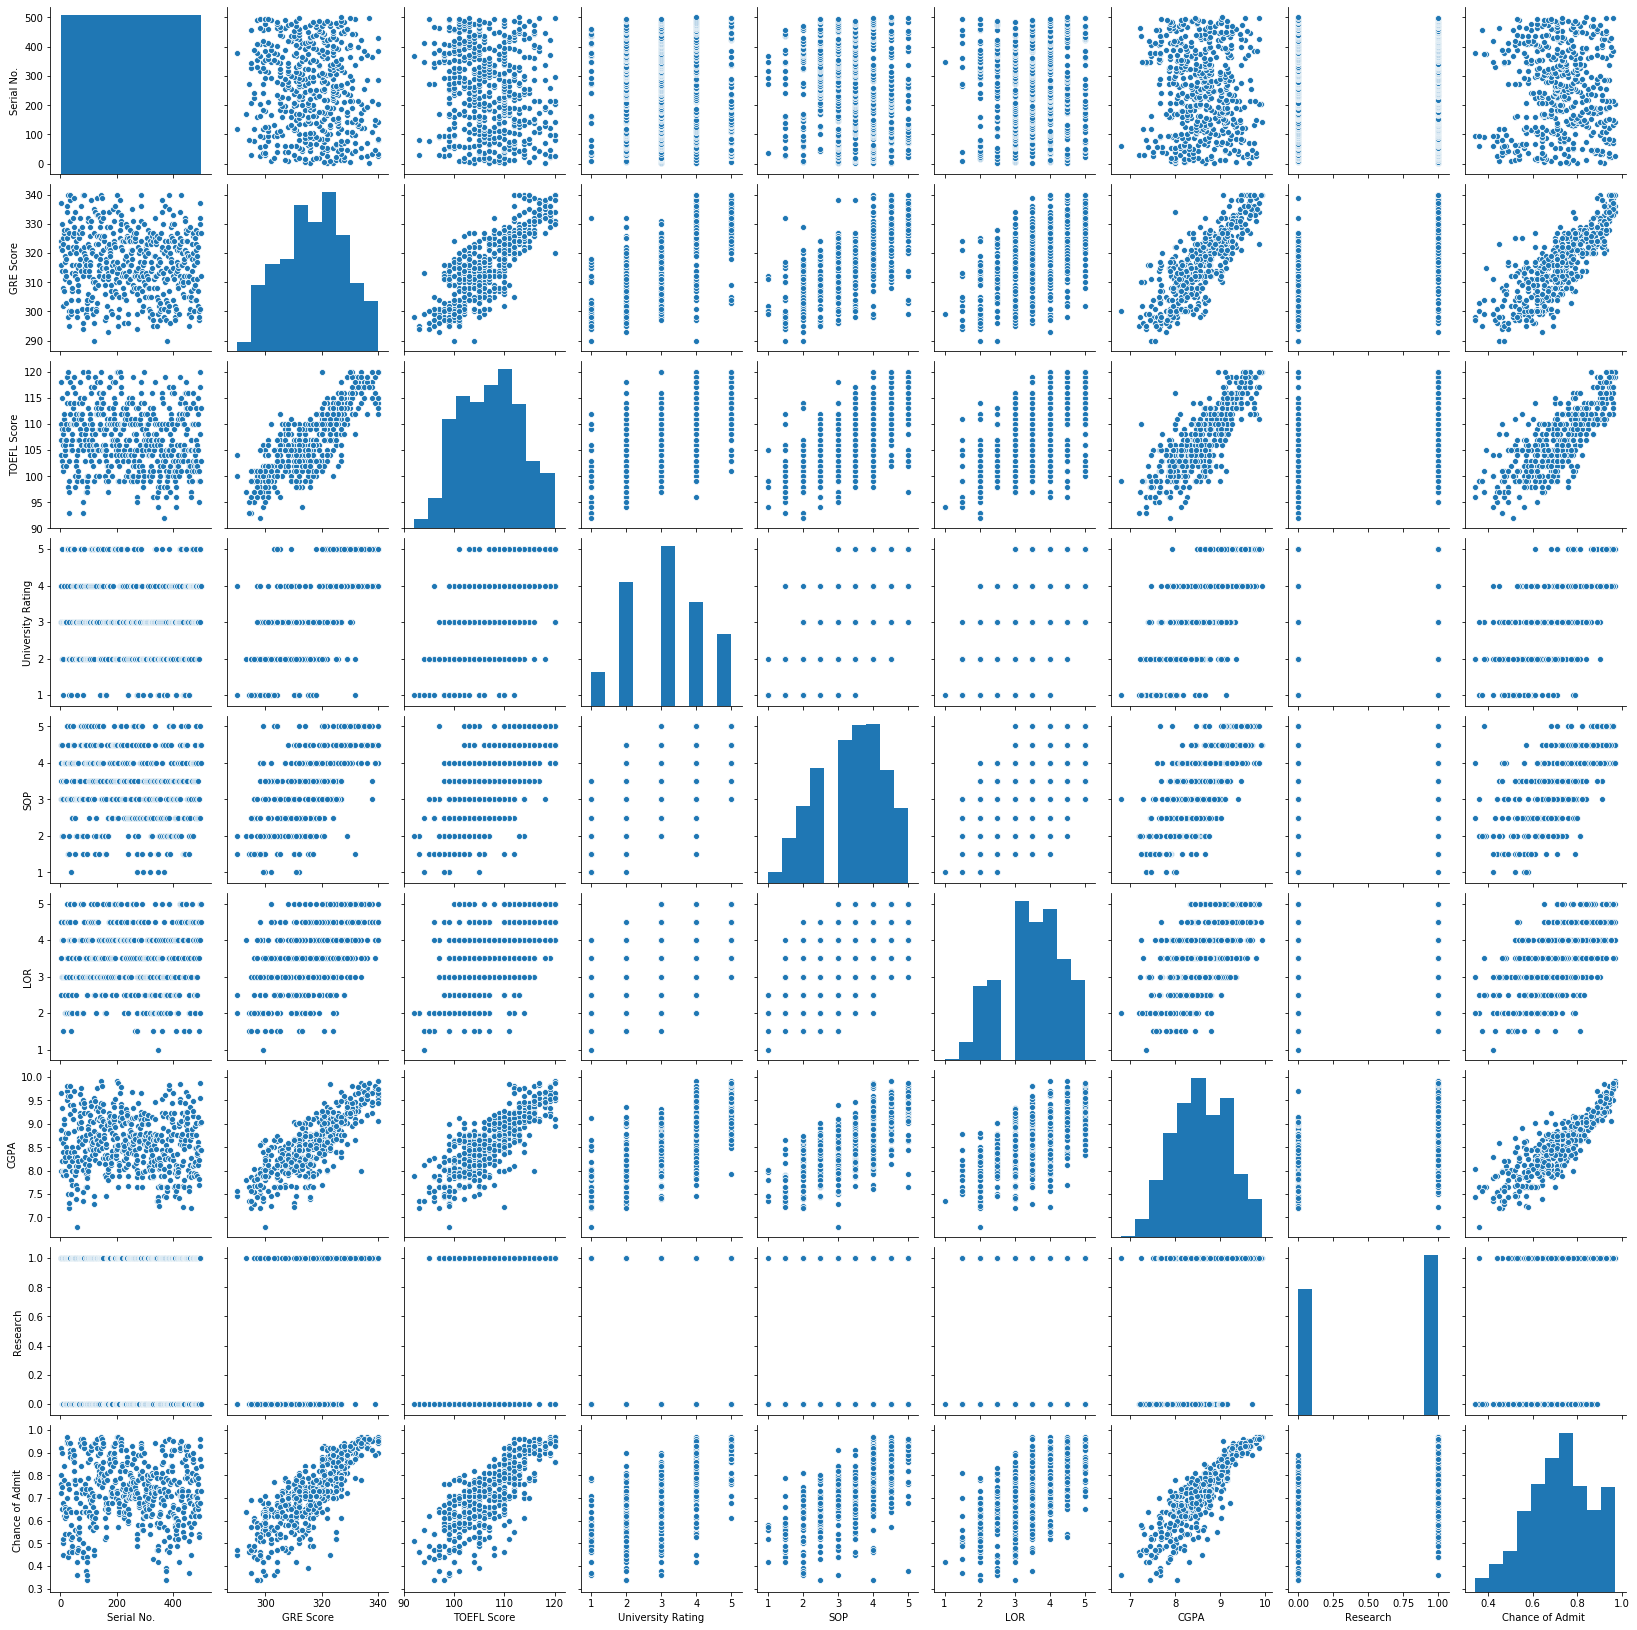

In [204]:
sns.pairplot(data)

Text(0.5, 1, 'HeatMap')

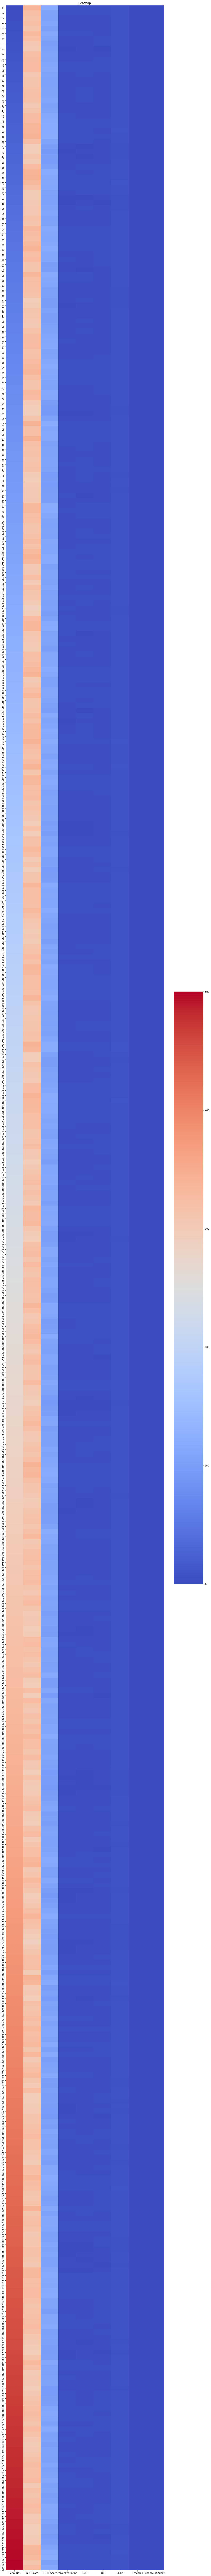

In [206]:
# heatmap to the features which influence the Chance of Admit the most
plt.rcParams['figure.figsize'] = (15, 200)
sns.heatmap(data, cmap = 'coolwarm')
plt.title('HeatMap' )

# the plot shows that GRE Score, TOEFL Score and CGPA matters the most

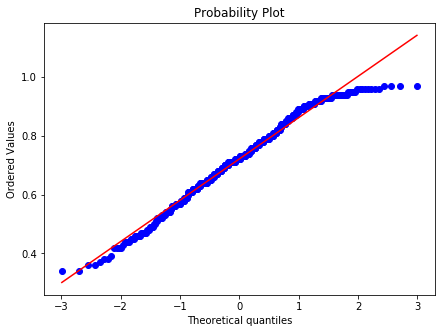

In [207]:
#probability curev
from scipy import stats

plt.rcParams['figure.figsize'] = (7, 5)
stats.probplot(data['Chance of Admit '], plot = plt)
plt.show()

### Modelling

In [210]:
#defining the features and target
x = data.drop(['Serial No.', 'Chance of Admit '], axis = 1)
y = data.iloc[:, -1]

#splitiing of the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [231]:
#Standardizing the feature variables
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


#### Linear Regression

In [227]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, linreg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, linreg_pred)
print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.06387237301527245
R-Squared Error: 0.7664048993199386


#### Extra Tree Regressor 

In [228]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,r2_score

etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
etr_pred = etr.predict(x_test)

mse = mean_squared_error(y_test, etr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, etr_pred)
print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)


Root Mean Squared Error :  0.07244473755905256
R-Squared Error: 0.6994952690419273


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Random Forest Regressor

In [229]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
rfr_pred = linreg.predict(x_test)

mse = mean_squared_error(y_test, rfr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rfr_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)


Root Mean Squared Error :  0.06387237301527245
R-Squared Error: 0.7664048993199386


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Support Vector Regression

In [230]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score

svr = SVR()
svr.fit(x_train, y_train)
svr_pred = svr.predict(x_test)

mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)

print("Root Mean Squared Error : ",rmse)
print("R-Squared Error:", r2)

Root Mean Squared Error :  0.07363644273081973
R-Squared Error: 0.6895274368056059
